# Exercise 3 | Application of Data Analysis
## Pain assessment from biosignal data

# ¤¤¤¤ Instructions ¤¤¤¤
K-Nearest Neighbor Classification with euclidean distance for pain intensity level prediction using biosignal features.

## Data description:
- Original data source (open data): https://datadryad.org/stash/dataset/doi:10.5061/dryad.2b09s
- Article describing study setup, features etc.: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0140330

From the original zipped Excel, sheet 'Extracted_Features', out of 159 original biopotential features<br>
**nine features were chosen for your analysis:**

muscle **zygomaticus** electromyography (EMG)<br>
'CH22_Sim-corr' <br>
muscle **corrugator** electromyography (EMG)<br>
'CH23_Sim-corr', 'CH23_A-P2P', 'CH23_E-Shannon'<br>
muscle **trapezius** electromyography (EMG)<br>
'CH24_Sim-corr'<br><br>
**electrocardiography** (ECG)<br>
'CH25_meanRR', 'CH25_slopeRR'<br><br>
**electrodermal activity** (EDA)<br>
'CH26_A-P2P','CH26_A-RMS'

## Tasks:

<b>Data upload:</b><br>
1. Read data from the open data source https://raw.githubusercontent.com/elmasyr/ada/master/ex3_biovid_subset.csv<br>
Note! Use the url to obtain the data, not a local copy of the file.<br>
2. Check the uploaded data shortly. Note that the file contains more data than the listed features. Make sure you understand what is included in the dataset before proceeding. 

<b>Preprocessing:</b><br>
3. Check the two label columns "Label" and "Label_ord" distribution, answer the question i)--iii)
4. Check the descriptive statistics of the features, answer the question iv)
5. Standarize data using z-score.
6. Check the descriptive statistics of the standardized features, answer the question v)
7. Validate the c-index code you use (your own or library version)

<b>Analysis:</b><br>
7. With kNN classification (k=29), implement *your own Leave-Subject-Out cross-validation* (do not used ready-made libraries)<br>
Note! For kNN you can use e.g. sklearn kNN classifier
8. Report the C-index for each subject fold and average performance
9. Report also min, max and standard deviation of the C-indices
10. Answer the question vi)

## Bonus task: Leave-One-Out cross-validation

# ¤¤¤¤ Exercise work ¤¤¤¤

## Import libraries

In [1]:
# In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Read and visualize the dataset

### Upload the data and check the data dimesions (# of rows and columns)

In [2]:
# In this cell read the file from url https://raw.githubusercontent.com/elmasyr/ada/master/ex3_biovid_subset.csv

url="https://raw.githubusercontent.com/elmasyr/ada/master/ex3_biovid_subset.csv"
df=pd.read_csv(url)
#df

In [3]:
# Print the dataset dimesions (i.e. number of rows and columns)

print(df.shape)

(4140, 12)


### Checks
- dataset columns (assuming you use pandas), otherwise find some other methods to check the data content and printout the column names of the csv file
- check the subject numbering output and format

In [4]:
# Print here the column names
list(df.columns)

['Subject-ID',
 'Label',
 'Label_ord',
 'CH22_Sim-corr',
 'CH23_A-P2P',
 'CH23_E-Shannon',
 'CH23_Sim-corr',
 'CH24_Sim-corr',
 'CH26_A-P2P',
 'CH26_A-RMS',
 'CH25_meanRR',
 'CH25_slopeRR']

In [5]:
# Print out first five (5) unique subject identifications

df_id = df['Subject-ID'].unique().tolist()
print(df_id[:5])

['20120713-09_w_21', '20120713-13_m_41', '20120716-14_m_20', '20120717-09_w_23', '20120718-14_w_23']


### Plot 
- Plot all features (or numeric columns) in one plot (preferably subplots)<br>
Note! plot should be visible in the jupyter notebook

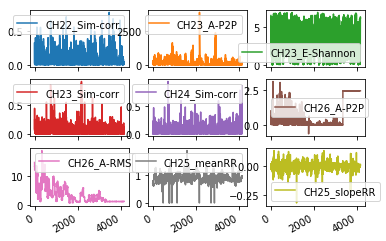

In [6]:
# Plot here all features

df_f =df.drop(df.columns[[0,1,2]], axis=1)
plot = df_f.plot(subplots=True, layout=(3,3), kind='line')
plt.show()

## Preprocessing

### Printout or plot the distribution of the column 'Label'

In [7]:
# Write your code here

print (df['Label'].value_counts())


level_zero    1700
level_four    1388
level_one     1052
Name: Label, dtype: int64


### <span style='background :yellow'> Questions i-ii </span>
i) Is the label evenly distributed?<br>
ii) Is the label order logical? Can this label be used in comparing relative ordering/ranking of the data points?

Answer here:<br>
i) No <br>
ii)No

### Printout or plot the distribution of the column 'Label_ord'

In [8]:
# Write your code here

df['Label_ord'].value_counts()

0    1700
4    1388
1    1052
Name: Label_ord, dtype: int64

### <span style='background :yellow'> Question iii </span>
iii) Which one of the labels should be used in classification? Why?

Answer here:<br>
iii) Laber_ord, because it is already in integer so its easier to use.

## Standardization

### Print the descriptive statistics of the features 
- at least count, mean, std, min and max need to be shown
- no plotting

In [9]:
# Write your code here
df_f =df.drop(df.columns[[0,1,2]], axis=1)

count_f = df_f.count()

mean_f = df_f.mean()

std_f = df_f.std()

min_f = df_f.min()

max_f = df_f.max()

print('Count:')
print(count_f)
print('Mean:')
print(mean_f)
print('Std:')
print(std_f)
print('Min:')
print(min_f)
print('Max:')
print(max_f)

Count:
CH22_Sim-corr     4140
CH23_A-P2P        4140
CH23_E-Shannon    4140
CH23_Sim-corr     4140
CH24_Sim-corr     4140
CH26_A-P2P        4140
CH26_A-RMS        4140
CH25_meanRR       4140
CH25_slopeRR      4140
dtype: int64
Mean:
CH22_Sim-corr      0.050570
CH23_A-P2P        96.920191
CH23_E-Shannon     3.826557
CH23_Sim-corr      0.049376
CH24_Sim-corr      0.047911
CH26_A-P2P         0.595780
CH26_A-RMS         3.290203
CH25_meanRR        0.899374
CH25_slopeRR      -0.003644
dtype: float64
Std:
CH22_Sim-corr       0.078804
CH23_A-P2P        228.176970
CH23_E-Shannon      1.923046
CH23_Sim-corr       0.078477
CH24_Sim-corr       0.059807
CH26_A-P2P          0.943576
CH26_A-RMS          2.981606
CH25_meanRR         0.153013
CH25_slopeRR        0.024603
dtype: float64
Min:
CH22_Sim-corr     0.000000
CH23_A-P2P        0.000000
CH23_E-Shannon    0.000000
CH23_Sim-corr     0.000000
CH24_Sim-corr     0.000009
CH26_A-P2P       -0.624000
CH26_A-RMS        0.599959
CH25_meanRR       0.00000

### <span style='background :yellow'> Question iv </span>
iv) Why do the features need to be standardized?

Answer here:<br>
iv) Because the range of values can vary a lot, it has to be standardized. This way functions like calculating the euclidean distance between two points work properly.

### Standardize the dataset features using z-score standardization

In [10]:
#Use this cell for the z-score standardization
df_f_z = df_f.apply(stats.zscore)


### Check the outcome, descriptive statistics of the standardized features
- at least count, mean, std, min and max need to be shown

In [11]:
# Write your code here

count_f_z = df_f_z.count()

mean_f_z = df_f_z.mean()

std_f_z = df_f_z.std()

min_f_z = df_f_z.min()

max_f_z = df_f_z.max()

print('Count:')
print(count_f_z)
print('Mean:')
print(mean_f_z)
print('Std:')
print(std_f_z)
print('Min:')
print(min_f_z)
print('Max:')
print(max_f_z)


Count:
CH22_Sim-corr     4140
CH23_A-P2P        4140
CH23_E-Shannon    4140
CH23_Sim-corr     4140
CH24_Sim-corr     4140
CH26_A-P2P        4140
CH26_A-RMS        4140
CH25_meanRR       4140
CH25_slopeRR      4140
dtype: int64
Mean:
CH22_Sim-corr     1.130805e-16
CH23_A-P2P        1.028163e-16
CH23_E-Shannon   -1.515696e-16
CH23_Sim-corr    -2.090116e-16
CH24_Sim-corr    -4.130737e-17
CH26_A-P2P       -9.002461e-16
CH26_A-RMS       -9.193398e-16
CH25_meanRR      -7.577138e-17
CH25_slopeRR     -1.607678e-17
dtype: float64
Std:
CH22_Sim-corr     1.000121
CH23_A-P2P        1.000121
CH23_E-Shannon    1.000121
CH23_Sim-corr     1.000121
CH24_Sim-corr     1.000121
CH26_A-P2P        1.000121
CH26_A-RMS        1.000121
CH25_meanRR       1.000121
CH25_slopeRR      1.000121
dtype: float64
Min:
CH22_Sim-corr     -0.641791
CH23_A-P2P        -0.424810
CH23_E-Shannon    -1.990082
CH23_Sim-corr     -0.629256
CH24_Sim-corr     -0.801043
CH26_A-P2P        -1.292876
CH26_A-RMS        -0.902390
CH25_mean

### <span style='background :yellow'> Question v <span>
v) What are the mean and the standard deviation of the standardized features?

Answer here:<br>
v) Standardized features mean their standard deviations from their mean values. This is why the mean value should be 0 (average value) and standard deviation 1.

## C-index code 

In [12]:
'''given true labels and corresponding predictions, 
calculates the C-index score
Note! You can also use an existing library version of the concordance index'''

def cindex(true_labels, predictions):
    n = 0
    h_sum = 0

    for i in range (len(true_labels)):
        t = true_labels[i]
        p = predictions[i]
        j= i+1
        for j in range(len(true_labels)):
            nt = true_labels[j]
            np = predictions[j]
            if t != nt:
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt):
                    h_sum = h_sum + 1
                elif p == np:
                    h_sum = h_sum + 0.5
    cindx = h_sum/n
    return cindx

### Test c-index function

In [13]:
#test cindex function with following values
#additionally you can add your own short test to show 
true_labels = [0, 1, 4, 0, 4]
predictions = [4, 1, 4, 0, 4]
cindx = cindex(true_labels, predictions)
print(cindx)

0.75


## Analysis

With kNN classification (k=29), implement Leave-Subject-Out cross-validation and calculate the C-index for each subject
- printout the C-indices for 10 fist subjects
- calculate and printout average of all subject fold C-indices
- calculate and printout the min, max, standard deviation of all subject specific C-indices

### Functions

In [14]:
# Include here all the functions that you need to run in the data analysis part.
# If you have several functions, consider putting them in separate cells, might make the testing and browsing easier


### Results for Leave-Subject-Out cross-validation

In [15]:
# In this cell run your script for leave-Subject-Out cross-validation and print the C-indices for 10 first subject folds.
# In this cell, or in an additional one, printout the average of all indices.
# In this cell, or in an additional one, printout the min, max and std of all indices.

# Get subject ids and labels
df_t = df.drop(df.columns[[3,4,5,6,7,8,9,10,11]], axis=1)


# Merging standardised features with id and labels
df_c = pd.concat([df_t, df_f_z], axis=1)

#Convert to numpy array
df_a = df_c.values


# Array to store C-index values

c_index_array = []

#Loop for every subject

for subject in range(len(df_id)):
    
    # True labels array
    true_labels = []
    
    # Predicted labels array
    pred_labels = []
    
    
    # Creating test set for each subject 
    testset = df_a[np.where(df_a[:,0] == df_id[subject])]
    #testset_r = testset[:, [3,4,5,6,7,8,9,10,11]]
    
    # Get row indices of each subjects rows
    testset_index = np.where(df_a[:,0] == df_id[subject])
    #print(testset_index)
    
    # Creating a training set
    # Deleting test set rows using subject id (Leave-subject-out cross-validation)
    trainset = np.delete(df_a, (testset_index), axis=0)
    trainset_f =trainset[:, [3,4,5,6,7,8,9,10,11]].astype(np.float)
    trainset_t =trainset[:, 2].astype(np.float)
    
    # Knn for each testset row
    for x in range(len(testset)):
        
            # Row used
        
            test_row = testset[x, [3,4,5,6,7,8,9,10,11]].astype(np.float)
        
            # pain levels as true labels
        
            true_label = testset[x, 2]
        
            true_labels.append(true_label)
            #print(true_labels)
            # Predictions using sklearn knn with k=29
            knn = KNeighborsClassifier(n_neighbors=29)
            knn.fit(trainset_f, trainset_t)
            knn_predictions = knn.predict([test_row])
            pred_labels.append(knn_predictions)
    #print(true_labels)
    #print(pred_labels)
    #Calculate c-index
    c_index = cindex(true_labels, pred_labels)
    
    # Add each subjects c-index to array
    c_index_array.append(c_index)
    
    #Print first 10 subjects c-index
    if subject < 10:
        print('Subject ID:', df_id[subject])
        print ('C-index:', c_index)



Subject ID: 20120713-09_w_21
C-index: 0.6681564245810055
Subject ID: 20120713-13_m_41
C-index: 0.9316770186335404
Subject ID: 20120716-14_m_20
C-index: 0.8629441624365483
Subject ID: 20120717-09_w_23
C-index: 0.535064935064935
Subject ID: 20120718-14_w_23
C-index: 0.8640776699029126
Subject ID: 20120719-11_w_24
C-index: 0.8069444444444445
Subject ID: 20120724-14_m_23
C-index: 0.8316176470588236
Subject ID: 20120725-14_m_27
C-index: 0.6997563946406821
Subject ID: 20120726-09_w_23
C-index: 0.8692893401015228
Subject ID: 20120727-14_m_23
C-index: 0.6818181818181818


In [16]:
#print(c_index_array[:10])    
print('C-index average:', np.average(c_index_array))
print('C-index standard deviation:', np.std(c_index_array))
print('C-index minimum:', np.amin(c_index_array))
print('C-index maximum:', np.amax(c_index_array))

C-index average: 0.77507240995
C-index standard deviation: 0.0913672262447
C-index minimum: 0.522547914318
C-index maximum: 0.931677018634


### <span style='background :yellow'>Question vi</span> -- Interpretation of results
vi) What is your interpretation on the results?

Answer here:<br>
vi) To me it seems there seems to be quite high deviation, at least betweem the minimum and maximum values. This means there are noticable differences between subjects regarding these features. 